# Canada Refugee Statistics Exploratory Data Analysis

In this project we perform Exploratory Data Analysis **(EDA)** on **UNHCR Refugee Statistics** for **Canada** from **2012-2022.**


_Original dataset can be downloaded from the [unhcr.org](https://www.unhcr.org/refugee-statistics/download/?url=8tIY7I) website._

## Analysis Questions

1. From which countries has Canada admitted the highest number of refugees?
2. What are the total number of resettled refugees in Canada per year?
3. What are the countries of origin for the majority of asylum claims made in Canada?
4. What is the total number of asylum claims made in Canada every year?
5. What are the general trends in refugee and asylum statistics from 2012-2022?

## Important Distinction: Refugees vs. Asylum Seekers

**The 1951 Refugee Convention defines a refugee as:** “A person who, owing to a well-founded fear of being persecuted for reasons of race, religion, nationality, membership of a particular social group or political opinion, is outside the country of his nationality and is unable or, owing to such fear, unwilling to avail himself of the protection of that country”.
> - In this data set, UNHCR-Refugees refers to people who have been resettled to Canada, and arrive to the country as permanent residents.
    
**An asylum seeker (or claimant) on the other hand is defined as** someone who is seeking international protection but has not yet been granted refugee status. 
> - In this data set, asylum-seeker refers to someone who has arrived in Canada as a visitor, worker, student, etc., through official or unofficial ports of entry, and who applied for protection from within Canada (after arrival). 

_For more information and definitions, visit the [unhcr.ca](https://www.unhcr.ca/about-us/frequently-asked-questions/#:~:text=An%20asylum%2Dseeker%20is%20someone,yet%20been%20granted%20refugee%20status.) website._

## Notebook Content

1. **Step 1:** Install + Import Necessary Libraries
2. **Step 2:** Reading, Exploring and Preparing Data
3. **Step 3:** Exploratory Data Analysis + Visualization
4. **2012- 2022 Canada Refugee Statistics EDA Results Summary**

### Step 1: Import Neccessary Libraries

In [1]:
# Install neccessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [98]:
#  function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')

### Read, Understand and Explore the Dataset

In [2]:
df = pd.read_csv('can-stats-2012-22.csv')
df.head() # display the first 5 rows

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


In [9]:
df.shape

(1870, 5)

In [3]:
# display the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [103]:
df.isnull().sum()

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

In [7]:
# check for number of missing data
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


**Observation** There is no missing data in the data

In [10]:
df.corr()

,Year,UNHCR-refugees,Asylum-seekers,total-count
Year,1.000000,-0.024037,0.144239,0.037578
UNHCR-refugees,-0.024037,1.000000,0.278267,0.924737
Asylum-seekers,0.144239,0.278267,1.000000,0.622897
total-count,0.037578,0.924737,0.622897,1.000000


In [11]:
df.columns

Index(['Year', 'Country-of-origin', 'UNHCR-refugees', 'Asylum-seekers',
       'total-count'],
      dtype='object')

In [105]:
df.duplicated().sum()

0

### Exploratory Data Analysis

### Question 1: From which countries has Canada admitted the highest number of refugees?

In [83]:
top_refugee_countries = df.groupby("Country-of-origin")['UNHCR-refugees'].sum().reset_index().sort_values('UNHCR-refugees', ascending=False)[0:10]
top_refugee_countries

,Country-of-origin,UNHCR-refugees
35,Colombia,108416
33,China,98586
170,Ukraine,88376
121,Pakistan,74737
72,Haiti,70956
152,Sri Lanka,66343
117,Nigeria,60554
106,Mexico,51072
168,Türkiye,42533
78,Iran (Islamic Rep. of),40881


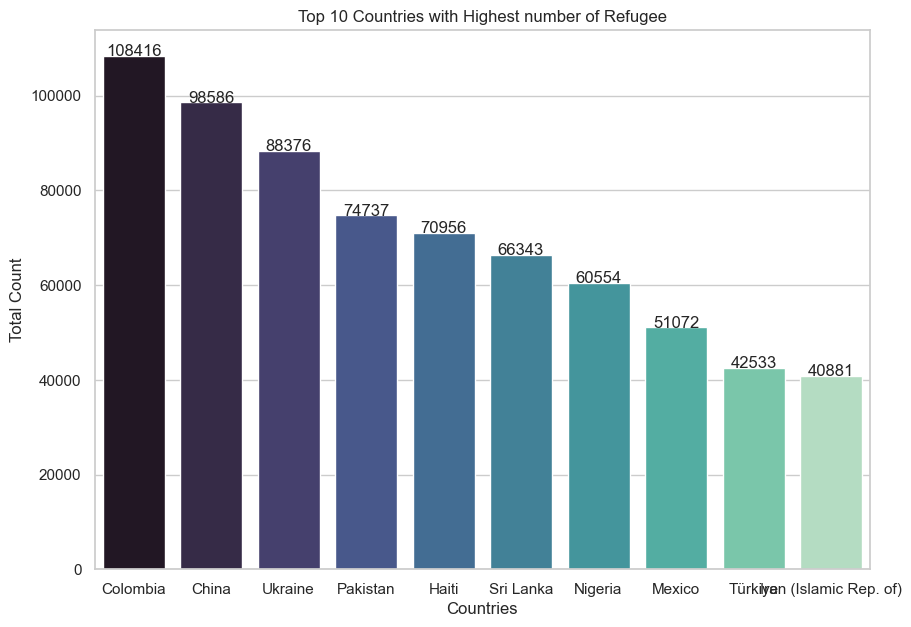

In [120]:
plt.figure(figsize=(10,7))
sns.barplot(x='Country-of-origin', y='UNHCR-refugees', data=top_refugee_countries, palette='mako')
        
plt.title("Top 10 Countries with Highest number of Refugee")
plt.xlabel("Countries")
plt.ylabel("Total Count")

# calling the function to add value labels
addlabels(top_refugee_countries['Country-of-origin'].to_list(),top_refugee_countries['UNHCR-refugees'].to_list())

plt.show()

### Question 2: What are the total number of resettled refugees in Canada per year?

In [60]:
total_resettled_yrly = df.groupby("Year")['UNHCR-refugees'].sum().reset_index().sort_values('Year')
total_resettled_yrly

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


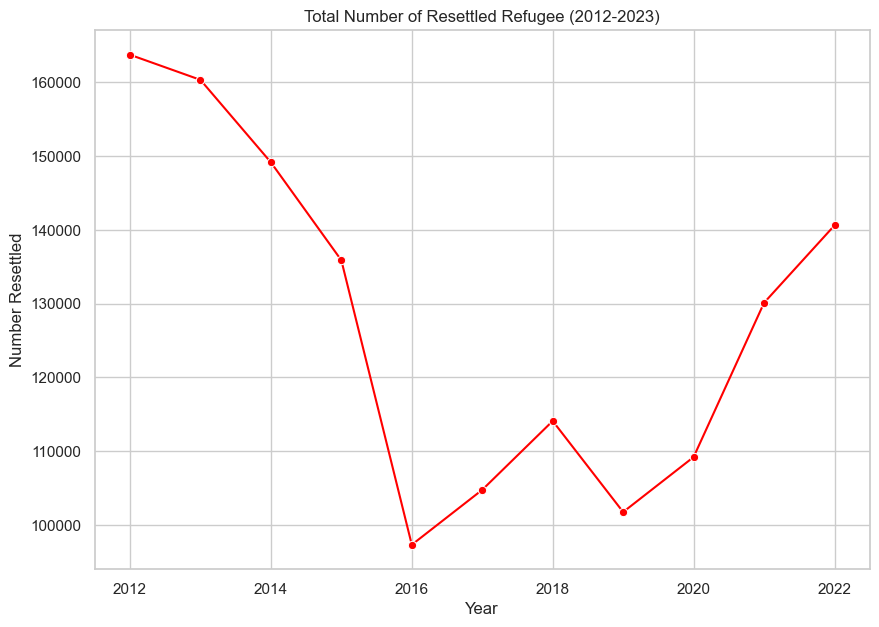

In [127]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='UNHCR-refugees', data=total_resettled_yrly, marker='o', color='red')

plt.title("Total Number of Resettled Refugee (2012-2023)")
plt.xlabel("Year")
plt.ylabel("Number Resettled")
plt.grid(visible=True)
plt.show()

### Question 3: What are the countries of origin for the majority of asylum claims made in Canada?

In [68]:
top_highest_asylum = df.groupby("Country-of-origin")['Asylum-seekers'].sum().reset_index().sort_values('Asylum-seekers', ascending=False)[0:10]
top_highest_asylum

,Country-of-origin,Asylum-seekers
175,Unknown,56098
117,Nigeria,51620
76,India,48806
106,Mexico,47146
72,Haiti,40908
35,Colombia,30475
33,China,21526
121,Pakistan,19023
168,Türkiye,18166
78,Iran (Islamic Rep. of),15011


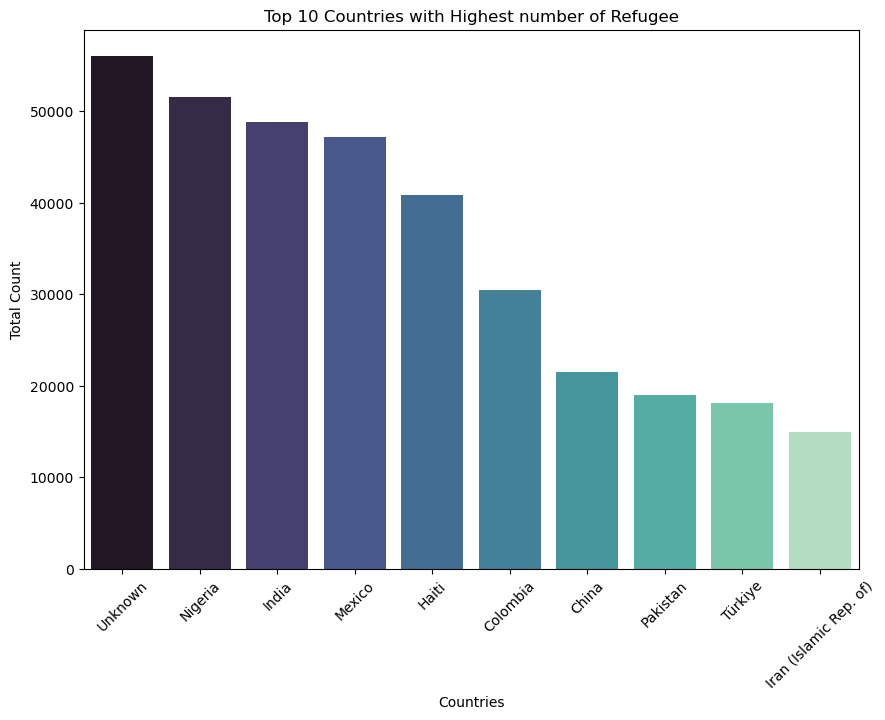

In [87]:
plt.figure(figsize=(10,7))
sns.barplot(x='Country-of-origin', y='Asylum-seekers', data=top_highest_asylum, palette='mako')

plt.title("Top 10 Countries with Highest number of Refugee")
plt.xlabel("Countries")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.show()

### Question 4: What is the total number of asylum claims made in Canada every year?

In [70]:
total_asylum_yrly = df.groupby("Year")['Asylum-seekers'].sum().reset_index().sort_values('Year')
total_asylum_yrly

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


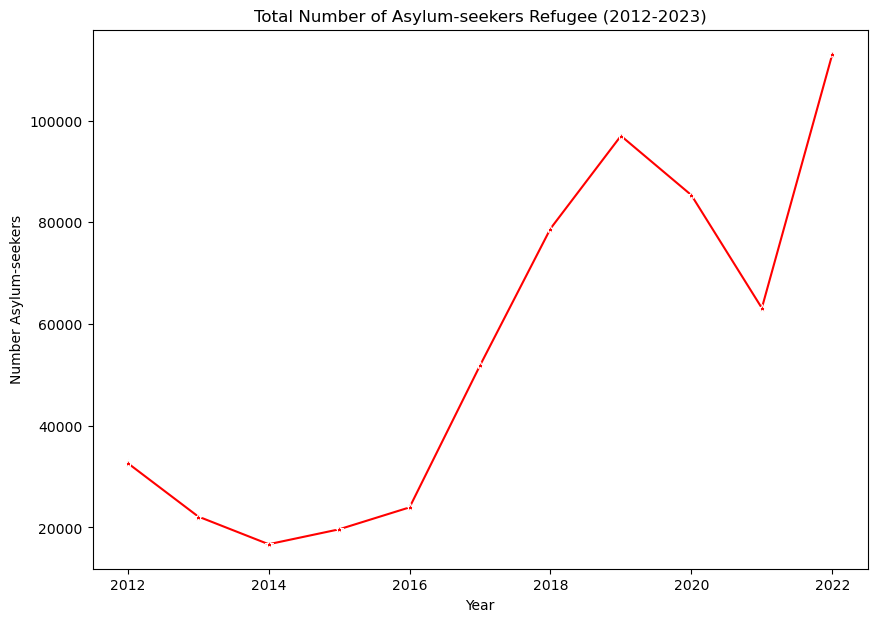

In [71]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Asylum-seekers', data=total_asylum_yrly, marker='*', color='red')

plt.title("Total Number of Asylum-seekers Refugee (2012-2023)")
plt.xlabel("Year")
plt.ylabel("Number Asylum-seekers")

plt.show()

### Question 5: What are the general trends in refugee and asylum statistics from 2012-2022?

In [73]:
top_refugee_countries = df.groupby("Country-of-origin")['total-count'].sum().reset_index().sort_values('total-count', ascending=False)[0:10]
top_refugee_countries

,Country-of-origin,total-count
35,Colombia,138891
33,China,120112
117,Nigeria,112174
72,Haiti,111864
106,Mexico,98218
121,Pakistan,93760
170,Ukraine,91182
76,India,81757
152,Sri Lanka,75102
175,Unknown,72545


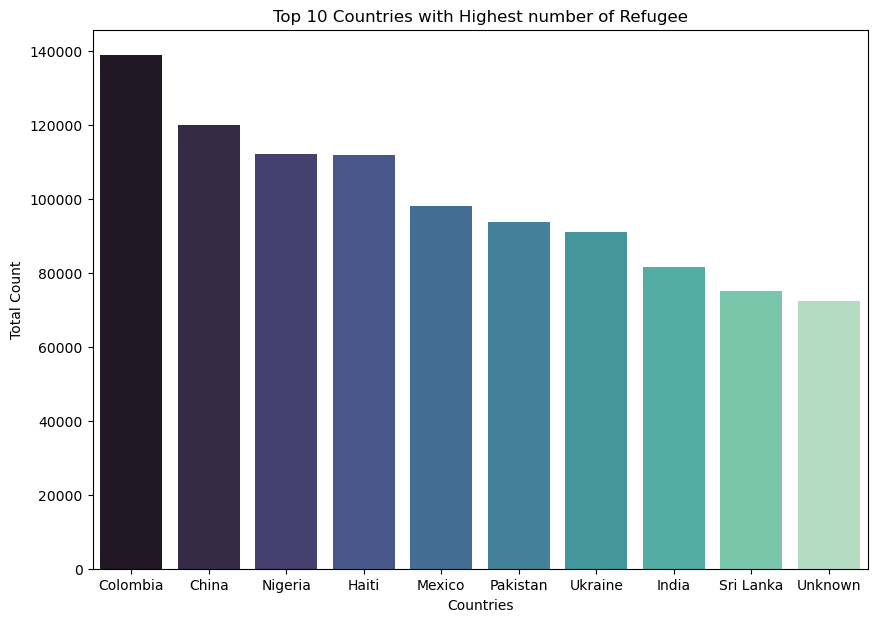

In [74]:
plt.figure(figsize=(10,7))
sns.barplot(x='Country-of-origin', y='total-count', data=top_refugee_countries, palette='mako')

plt.title("Top 10 Countries with Highest number of Refugee")
plt.xlabel("Countries")
plt.ylabel("Total Count")

plt.show()

In [75]:
resettled_and_asylum_yrls = df.groupby("Year")[['UNHCR-refugees', 'Asylum-seekers']].sum().reset_index().sort_values('Year')
resettled_and_asylum_yrls

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


In [77]:
melted_data = pd.melt(resettled_and_asylum_yrls, id_vars=['Year'], var_name="Category", value_name="Count")
melted_data

,Year,Category,Count
0,2012,UNHCR-refugees,163751
1,2013,UNHCR-refugees,160347
2,2014,UNHCR-refugees,149164
3,2015,UNHCR-refugees,135890
4,2016,UNHCR-refugees,97322
5,2017,UNHCR-refugees,104768
6,2018,UNHCR-refugees,114101
7,2019,UNHCR-refugees,101757
8,2020,UNHCR-refugees,109214
9,2021,UNHCR-refugees,130125


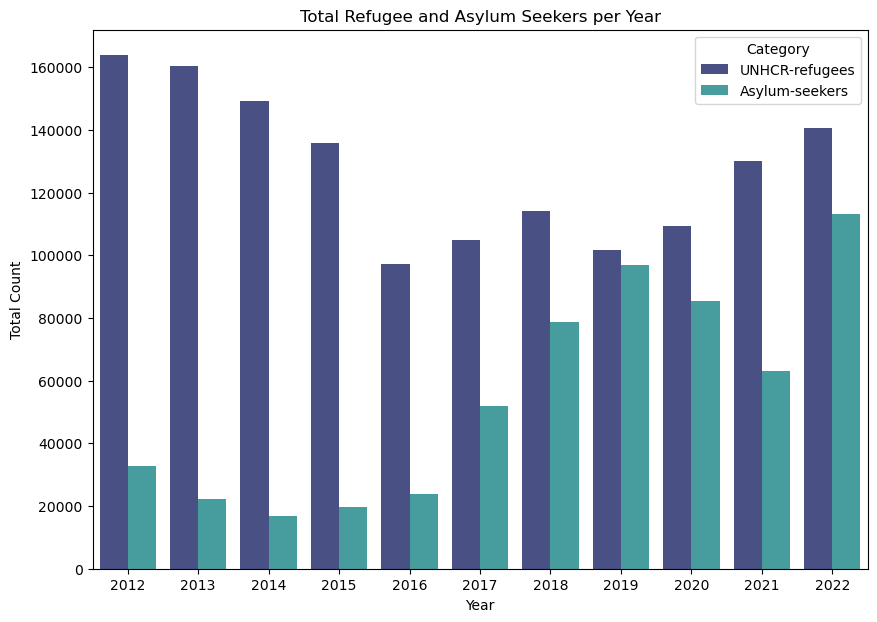

In [81]:
plt.figure(figsize=(10,7))
sns.barplot(x='Year', y='Count',hue="Category", data=melted_data, palette='mako')

plt.title("Total Refugee and Asylum Seekers per Year")
plt.xlabel("Year")
plt.ylabel("Total Count")

plt.show()

### Insights

**1. Countries from which Canada had Admitted Highest Number of Refugee**

* Colombia	(108416)	
* China	(98586)
* Ukraine	(88376)
* Pakistan	(74737)
* Haiti	(70956)
* Sri Lanka	(66343)
* Nigeria	(60554)
* Mexico	(51072)
* Türkiye	(42533)
* Iran (Islamic Rep. of)	(40881)

**2. Total Number of Resettled Refugees in Canada Per Year:**
* 2012: 163,751
* 2013: 160,347
* 2014: 149,164
* 2015: 135,890
* 2016: 97,322
* 2017: 104,768
* 2018: 114,101
* 2019: 101,757
* 2020: 109,214
* 2021: 130,125
* 2022: 140,621

**3. Countries of Origin for Majority of Claims Made in Canada:**
* Unknown (56,098)
* Nigeria (51,620)
* India (48,806)
* Mexico (47,146)
* Haiti (40,908)


**4. Total Number of Asylum Claims Made in Canada Every Year:**
* 2012: 32,647
* 2013: 22,145
* 2014: 16,699
* 2015: 19,631
* 2016: 23,946
* 2017: 51,859
* 2018: 78,766
* 2019: 97,017
* 2020: 85,352
* 2021: 63,143
* 2022: 113,066

**5. General Trends in Refugee and Asylum Statistics from 2012-2022:**
* 2012 was the year where Canada admitted the highest number of refugees, followed by 2013, 2014, and 2023.
* 2020 has the least number of resettled Refuge
* 